In [47]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split



In [48]:
#loading dataset
dataset = pd.read_csv (r'C:\Users\Mani\Desktop\Data Mining & ML\creditcardchurners dataset\BankChurners.csv')
dataset.head()


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [49]:
dataset.shape

(10127, 23)

In [50]:
dataset.describe()


CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [51]:
dataset.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace= True)


In [52]:
dataset.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace= True)


In [53]:
dataset.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [55]:
dataset.duplicated().sum()


0

In [56]:
#checking null values
pd.isnull(dataset).sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [57]:
#unique values in categorical columns
dataset.select_dtypes(include="object").nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [58]:
#summary of unique values in numerical col
dataset.select_dtypes(exclude="object").nunique()


CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [59]:
dataset.describe().T


count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

In [60]:
dataset.describe(include="object").T


count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

In [61]:
def unique_value_count():
    for col in (
        dataset.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values,count and percentage of feature: " + col)
        print("-" * 90)
        df_temp = pd.concat(
            [
                dataset[col].value_counts(),
                dataset[col].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)


In [62]:
unique_value_count()

Unique values,count and percentage of feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Existing Customer   8500   83.934038
Attrited Customer   1627   16.065962
------------------------------------------------------------------------------------------
Unique values,count and percentage of feature: Gender
------------------------------------------------------------------------------------------
   Count  Percentage
F   5358   52.908068
M   4769   47.091932
------------------------------------------------------------------------------------------
Unique values,count and percentage of feature: Education_Level
------------------------------------------------------------------------------------------
               Count  Percentage
Graduate        3128   30.887726
High School     2013   19.877555
Unknown         1519   14.999506
Uneducated      1487   14.683519
College         1013   10.0

In [63]:
#data preprocessig
dataset.drop(columns=['CLIENTNUM'],inplace=True)

In [64]:
dataset["Education_Level"] = dataset["Education_Level"].fillna("Unknown")
dataset["Marital_Status"] = dataset["Marital_Status"].fillna("Unknown")
dataset.loc[dataset[dataset["Income_Category"] == "abc"].index, "Income_Category"] = "Unknown"


In [65]:
#cross checking the outcome
unique_value_count()


Unique values,count and percentage of feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Existing Customer   8500   83.934038
Attrited Customer   1627   16.065962
------------------------------------------------------------------------------------------
Unique values,count and percentage of feature: Gender
------------------------------------------------------------------------------------------
   Count  Percentage
F   5358   52.908068
M   4769   47.091932
------------------------------------------------------------------------------------------
Unique values,count and percentage of feature: Education_Level
------------------------------------------------------------------------------------------
               Count  Percentage
Graduate        3128   30.887726
High School     2013   19.877555
Unknown         1519   14.999506
Uneducated      1487   14.683519
College         1013   10.0

In [66]:
#converting datatypes of categorical variables from object'float to category
cat_col = dataset.select_dtypes(include="object").columns.tolist()


In [67]:
dataset[cat_col] = dataset[cat_col].astype("category")


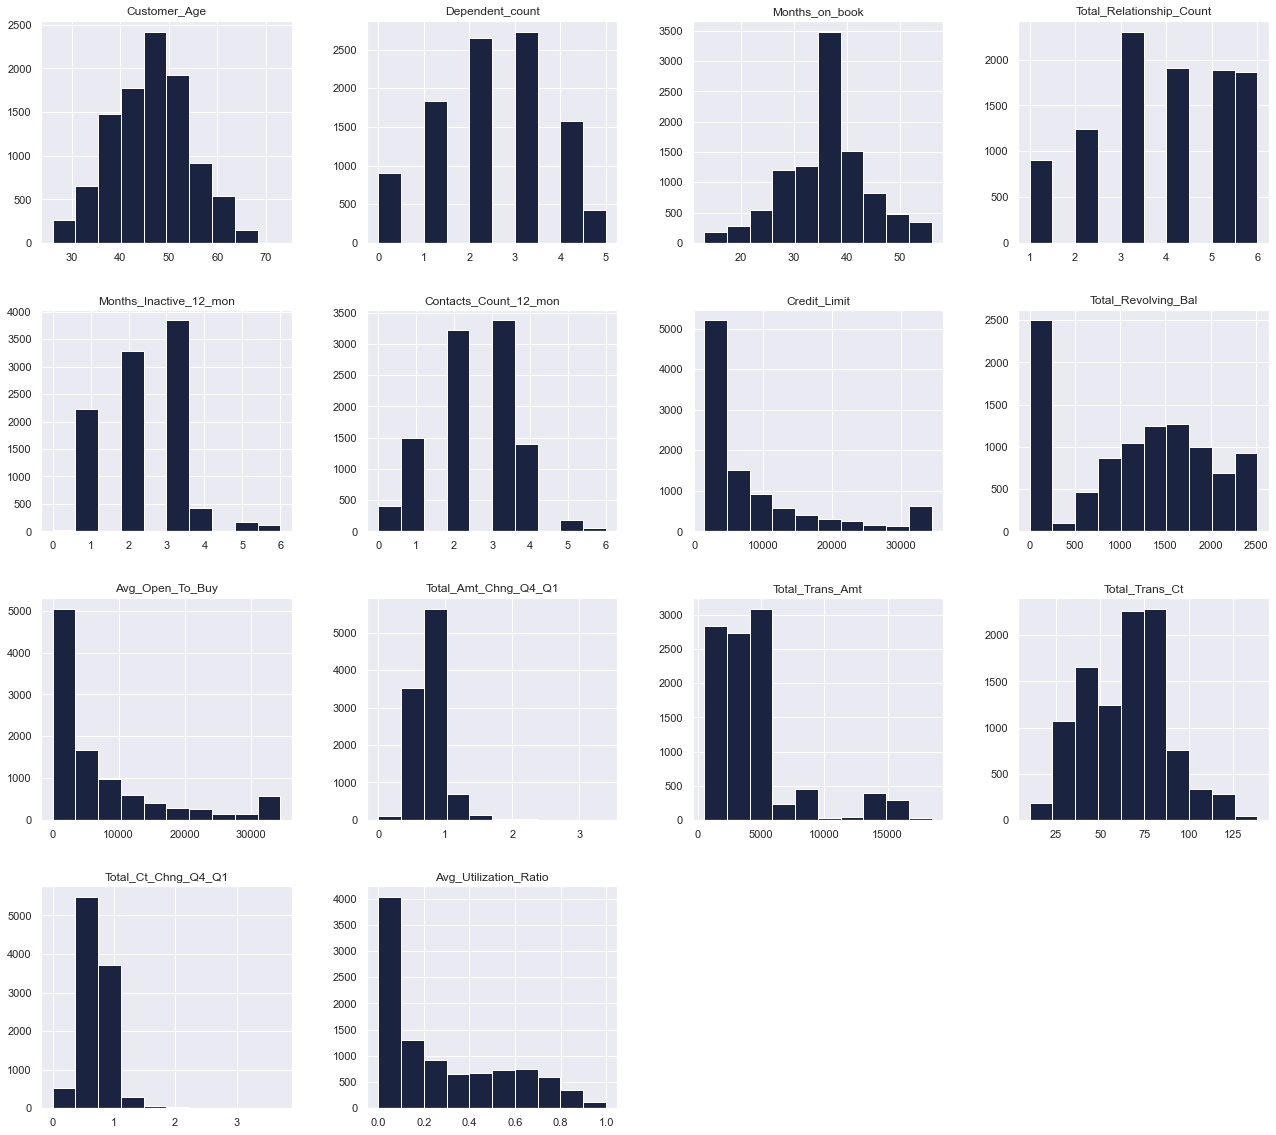

In [68]:
##EDA
dataset.hist( figsize = (22, 20) )
plt.show()


In [69]:
def EDA(df: pd.DataFrame, x, target):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm

    color1 = cm.inferno(np.linspace(0.4, 0.8, 30))
    color2 = cm.viridis(np.linspace(0.4, 0.8, 30))
    sns.set_palette("cubehelix")
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    """
    create a Pie Chart 
    """
    s = dataset.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct / 100.0 * np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax[0].pie(
        mydata_values,
        autopct=lambda pct: func(pct, mydata_values),
        textprops=dict(color="w"),
    )

    ax[0].legend(
        wedges,
        mydata_index,
        title=x.capitalize(),
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
    )

    plt.setp(autotexts, size=12)

    ax[0].set_title(f"{x.capitalize()} Pie Chart")

    """
    create Bar Graph 
    """

    df = pd.pivot_table(
        dataset, index=[x], columns=[target], values=["Credit_Limit"], aggfunc=len
    )

    labels = df.index.tolist()
    no = df.values[:, 1].tolist()
    yes = df.values[:, 0].tolist()

    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(
        l - width / 2, no, width, label="Existing Customer", color=color1
    )
    rects2 = ax[1].bar(
        l + width / 2, yes, width, label="Attrited Customer", color=color2
    )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel("Scores")
    ax[1].set_title(f"{x.capitalize()} Bar Graph")
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()

    def autolabel(rects):

        """adding a label  each bar in *rects*, displaying its height."""

        for rect in rects:
            height = rect.get_height()
            ax[1].annotate(
                "{}".format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                fontsize="medium",
                ha="center",
                va="bottom",
            )

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

    """
    create a Stacked Bar  """

    sns.set(palette="tab10")
    tab = pd.crosstab(dataset[x], dataset[target], normalize="index")

    tab.plot.bar(stacked=True, figsize=(16, 3))
    plt.title(x.capitalize() + " Stacked Bar Plot")
    plt.legend(loc="upper right", bbox_to_anchor=(0, 1))
    plt.show()


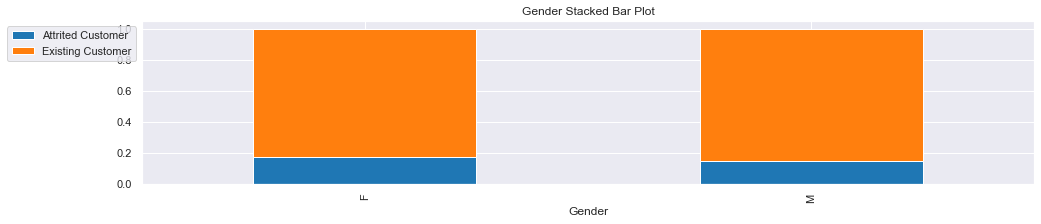

In [25]:
EDA(dataset, "Gender", "Attrition_Flag")

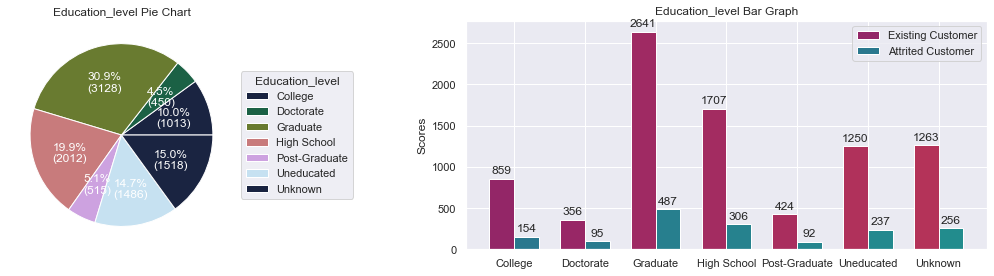

In [26]:
EDA(dataset, "Education_Level", "Attrition_Flag")


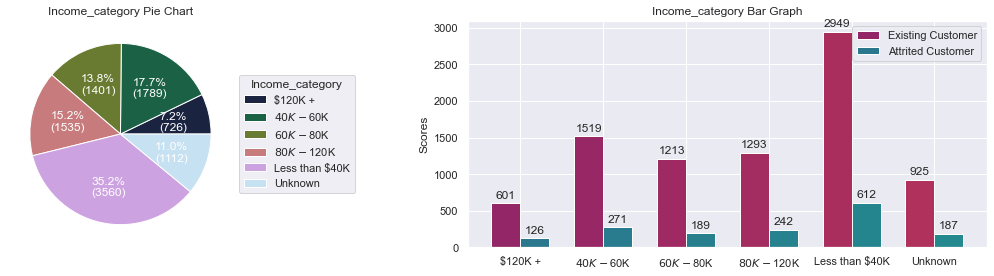

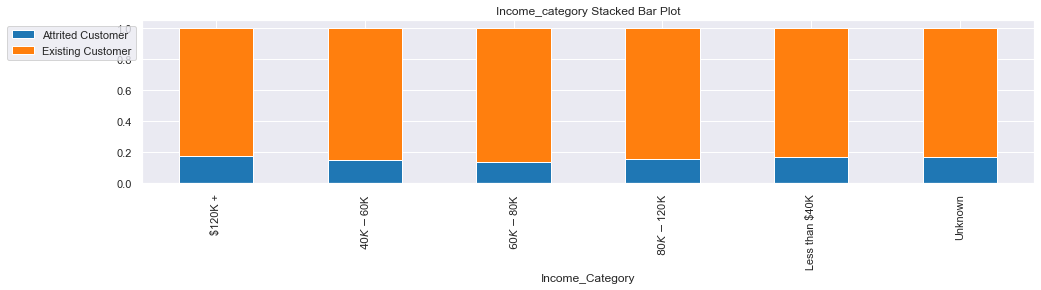

In [27]:
EDA(dataset, "Income_Category", "Attrition_Flag")


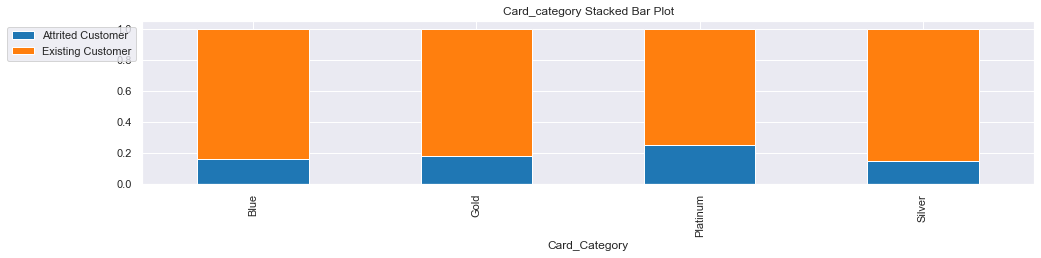

In [28]:
EDA(dataset, "Card_Category", "Attrition_Flag")

In [82]:
#pairplot 
plt.figure(figsize=(15, 5))
sns.set(palette="cubehelix")
sns.pairplot(data=dataset, hue="Attrition_Flag", corner=True)



<Figure size 1080x360 with 0 Axes>

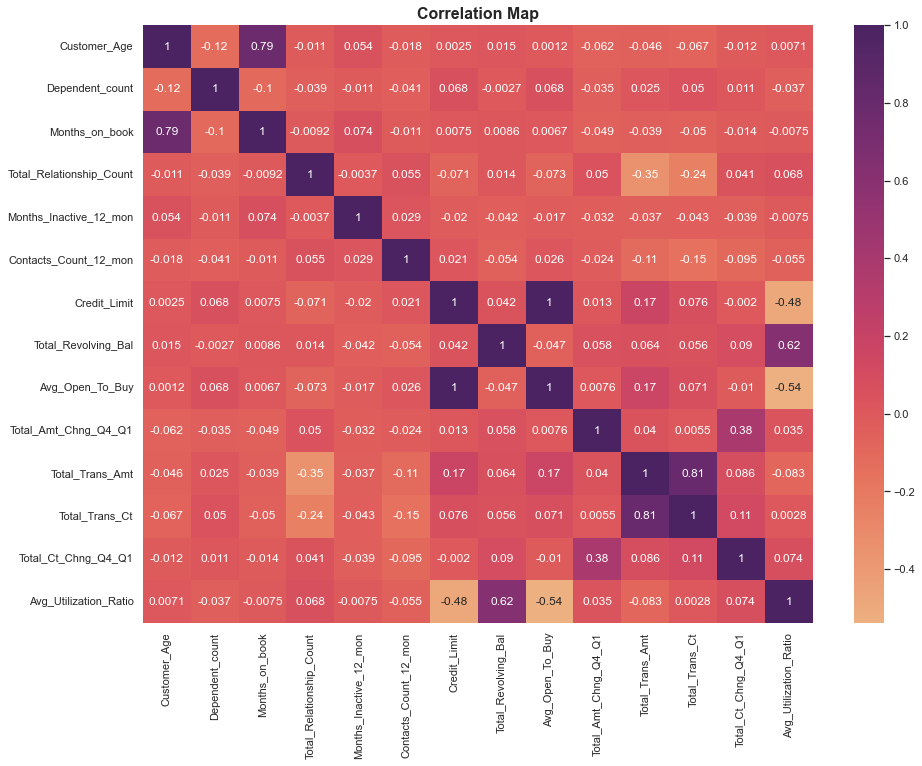

In [30]:
#correlation table
correlation=dataset.corr()
plt.figure(figsize=(15,11))
sns.heatmap(dataset.corr(), cmap='flare', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()

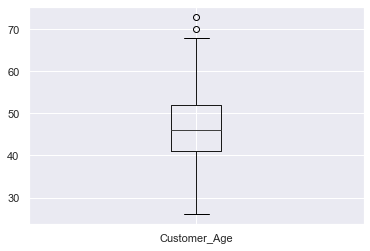

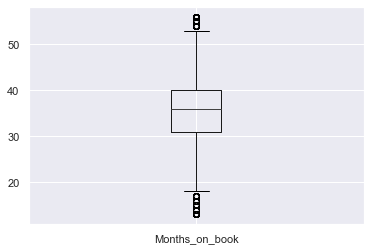

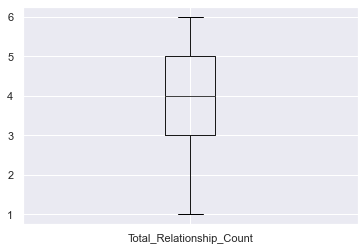

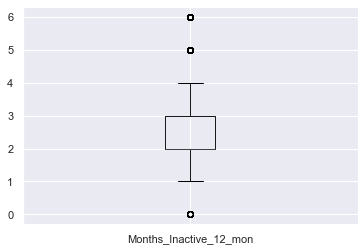

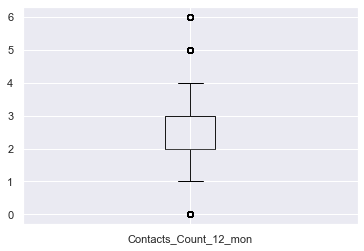

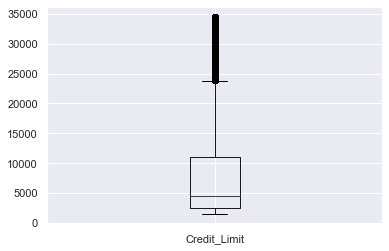

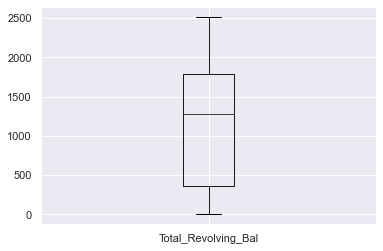

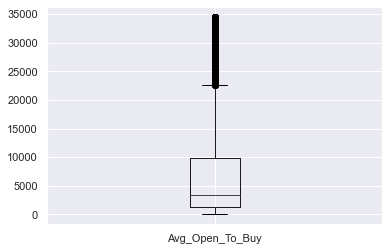

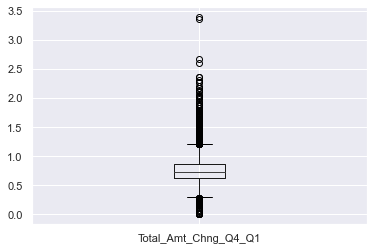

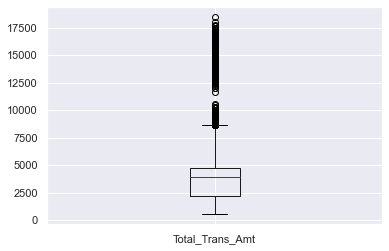

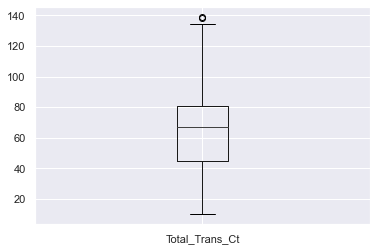

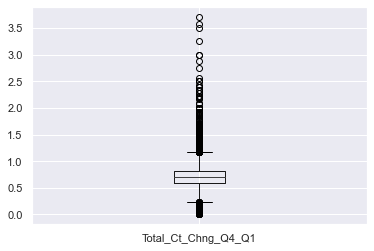

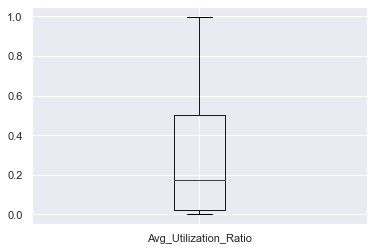

In [31]:
for column in dataset._get_numeric_data():
    plt.figure()
    dataset.boxplot([column])


In [32]:
dataset["Gender"]= pd.Series(np.where(dataset["Gender"].values =='M', 1, 0), dataset.index)
dataset["Attrition_Flag"]= pd.Series(np.where(dataset["Attrition_Flag"].values =='Existing Customer', 1, 0), dataset.index)

In [33]:
#as we can see in correlation table, experience & current job years columns are highly related than others.there might be repeated values in row values in dataset. SO data transformation is required ie.PCA
#formula is (value-mean)/standard deviation
columns=["Customer_Age","Months_on_book","Avg_Open_To_Buy","Credit_Limit","Total_Trans_Amt","Total_Trans_Ct"]
dataPCA=dataset[columns]
transformedDF=(dataPCA-dataPCA.mean(axis=0))/dataPCA.std()
transformedDF

Customer_Age  Months_on_book  Avg_Open_To_Buy  Credit_Limit  \
0         -0.165397        0.384602         0.488947      0.446600   
1          0.333554        1.010665        -0.008486     -0.041365   
2          0.583030        0.008964        -0.445636     -0.573669   
3         -0.789087       -0.241461        -0.734063     -0.585222   
4         -0.789087       -1.869225        -0.302853     -0.430856   
...             ...             ...              ...           ...   
10122      0.458292        0.509814        -0.584900     -0.509304   
10123     -0.664349       -1.368375        -0.591610     -0.479157   
10124     -0.290135        0.008964        -0.226621     -0.354608   
10125     -2.036465        0.008964        -0.240701     -0.368691   
10126     -0.414873       -1.368375         0.105367      0.193210   

       Total_Trans_Amt  Total_Trans_Ct  
0            -0.959659       -0.973847  
1            -0.916387       -1.357273  
2            -0.740945       -1.911111  
3            -0.951711       -1.911111  
4            -1.056211       -1.570288  
...                ...             ...  
10122         3.259197        2.221372  
10123         1.283411        0.176432  
10124         1.732908       -0.206995  
10125         1.174790       -0.121789  
10126         1.733791       -0.164392  

[10127 rows x 6 columns]

In [34]:
#applying PCA(principle component analysis) method to transformed DF
pca=PCA(n_components=6)
PC=pca.fit_transform(transformedDF)
principle=pd.DataFrame(data=PC,columns=['PC.Customer_Age','PC.Months_on_book','PC.Avg_Open_To_Buy','PC.Credit_Limit','PC.Total_Trans_Amt','PC.Total_Trans_Ct'])
principle.head()

PC.Customer_Age  PC.Months_on_book  PC.Avg_Open_To_Buy  PC.Credit_Limit  \
0        -0.268224          -0.764856           -1.290600        -0.397686   
1        -1.061238          -1.308466           -0.807130        -0.423703   
2        -1.684227          -0.688926           -0.938426         0.549158   
3        -1.791376           0.369237           -1.442872        -0.255297   
4        -1.229045           1.305992           -2.009415         0.810490   

   PC.Total_Trans_Amt  PC.Total_Trans_Ct  
0            0.041803          -0.024922  
1            0.383132          -0.018931  
2            0.753583          -0.087722  
3            0.784672           0.110758  
4            0.239357          -0.085454

In [35]:
#adding PCA columns into dataset
dataset=pd.concat([dataset,principle],axis=1)
dataset.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               1            45       1                3     High School   
1               1            49       0                5        Graduate   
2               1            51       1                3        Graduate   
3               1            40       0                4     High School   
4               1            40       1                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Total_Trans_Amt  Total_Trans_Ct  \
0                         5  ...             1144              42   
1                         6  ...             1291              33   
2                         4  ...             1887              20   
3                         3  ...             1171              20   
4                         5  ...              816              28   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  PC.Customer_Age  \
0                1.625                  0.061        -0.268224   
1                3.714                  0.105        -1.061238   
2                2.333                  0.000        -1.684227   
3                2.333                  0.760        -1.791376   
4                2.500                  0.000        -1.229045   

   PC.Months_on_book  PC.Avg_Open_To_Buy  PC.Credit_Limit  PC.Total_Trans_Amt  \
0          -0.764856           -1.290600        -0.397686            0.041803   
1          -1.308466           -0.807130        -0.423703            0.383132   
2          -0.688926           -0.938426         0.549158            0.753583   
3           0.369237           -1.442872        -0.255297            0.784672   
4           1.305992           -2.009415         0.810490            0.239357   

   PC.Total_Trans_Ct  
0          -0.024922  
1          -0.018931  
2          -0.087722  
3           0.110758  
4          -0.085454  

[5 rows x 26 columns]

In [36]:
#changing categorical values into numerical for training & test datasets by label encoder
cat_col=['Education_Level','Marital_Status',"Income_Category","Card_Category"]
label_encoder=LabelEncoder()
for col in cat_col:
    dataset[col]=label_encoder.fit_transform(dataset[col])
dataset

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   1            45       1                3                3   
1                   1            49       0                5                2   
2                   1            51       1                3                2   
3                   1            40       0                4                3   
4                   1            40       1                3                5   
...               ...           ...     ...              ...              ...   
10122               1            50       1                2                2   
10123               0            41       1                2                6   
10124               0            44       0                1                3   
10125               0            30       1                2                2   
10126               0            43       0                2                2   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                   1                2              0              39   
1                   2                4              0              44   
2                   1                3              0              36   
3                   3                4              0              34   
4                   1                2              0              21   
...               ...              ...            ...             ...   
10122               2                1              0              40   
10123               0                1              0              25   
10124               1                4              0              36   
10125               3                1              0              36   
10126               1                4              3              25   

       Total_Relationship_Count  ...  Total_Trans_Amt  Total_Trans_Ct  \
0                             5  ...             1144              42   
1                             6  ...             1291              33   
2                             4  ...             1887              20   
3                             3  ...             1171              20   
4                             5  ...              816              28   
...                         ...  ...              ...             ...   
10122                         3  ...            15476             117   
10123                         4  ...             8764              69   
10124                         5  ...            10291              60   
10125                         4  ...             8395              62   
10126                         6  ...            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  PC.Customer_Age  \
0                    1.625                  0.061        -0.268224   
1                    3.714                  0.105        -1.061238   
2                    2.333                  0.000        -1.684227   
3                    2.333                  0.760        -1.791376   
4                    2.500                  0.000        -1.229045   
...                    ...                    ...              ...   
10122                0.857                  0.462         1.537638   
10123                0.683                  0.511         0.196427   
10124                0.818                  0.000         0.366497   
10125                0.722                  0.000         0.310335   
10126                0.649                  0.189         1.019731   

       PC.Months_on_book  PC.Avg_Open_To_Buy  PC.Credit_Limit  \
0              -0.764856           -1.290600        -0.397686   
1              -1.308466           -0.807130        -0.423703   
2              -0.688926           -0.938426         0.549158   
3               0.369237           -1.442872        -0.255297   
4               1.305992           -2.009415         0.810490   
...                  ...                 ...     

In [37]:
#popping target variable from dataset & assiging to test dataset
#here the target variable is riskflag
if 'Attrition_Flag' in dataset.columns:
    target_data=dataset.pop('Attrition_Flag')
target_data


0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int32

In [38]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(dataset,target_data, test_size=0.2)


In [39]:
#scalling the data
#column wise normalization: subtracting mean & divifing with standard deviation,sothat column will be centere 0 & have unit standard deviation
mean = train_data.mean()
train_data -= mean
std = train_data.std()
train_data /= std

test_data -= mean
test_data /= std


In [40]:
train_data.head



<bound method NDFrame.head of       Customer_Age    Gender  Dependent_count  Education_Level  \
2477      1.072735  1.059081        -1.023688        -0.053110   
5418     -1.282811 -0.944098         0.514883        -0.598413   
5276      1.444664  1.059081         1.284168        -1.689018   
521      -2.522571  1.059081        -1.792973        -0.598413   
3655      0.204903  1.059081         1.284168         1.582798   
...            ...       ...              ...              ...   
3155     -1.034858 -0.944098         0.514883         1.037496   
8017     -0.167026  1.059081        -0.254403        -0.598413   
3429     -1.158834  1.059081         2.053454        -1.143716   
560      -2.522571  1.059081        -1.792973        -0.598413   
5090     -0.167026 -0.944098         0.514883        -0.053110   

      Marital_Status  Income_Category  Card_Category  Months_on_book  \
2477       -0.632048         0.083753      -0.261408        1.374683   
5418        0.725740        -1.24

In [41]:
train_target.shape

(8101,)

In [42]:
test_data.shape

(2026, 25)

In [43]:
test_target.shape

(2026,)

In [ ]:
#machine learning models


Accuracy of Random Forest Classifier on training set: 1.00000
Accuracy of Random Forest Classifier on test set: 0.96742
F1 Score: 0.9806565064478312

              precision    recall  f1-score   support

           0       0.94      0.85      0.90       336
           1       0.97      0.99      0.98      1690

    accuracy                           0.97      2026
   macro avg       0.96      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


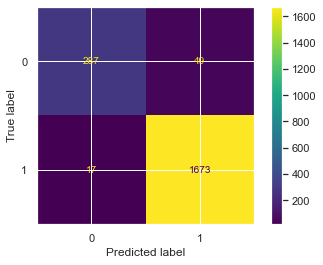

In [77]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(train_data, train_target)

print('Accuracy of Random Forest Classifier on training set: {:.5f}'.format(RFC.score(train_data, train_target)))
print('Accuracy of Random Forest Classifier on test set: {:.5f}'.format(RFC.score(test_data, test_target)))
pred = RFC.predict(test_data)
print(f'F1 Score: {f1_score(test_target,pred)}\n')
print(classification_report(test_target,pred))
plot_confusion_matrix(estimator=RFC,X=test_data,y_true=test_target)


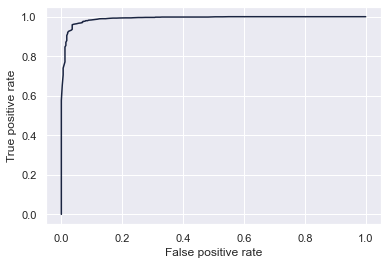

In [79]:
#assigning values
from sklearn import metrics
pre=RFC.predict_proba(test_data)[::,1]
falsepr,truepr,_=metrics.roc_curve(test_target, pre)
#ROC curve
plt.plot(falsepr,truepr)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()


Accuracy of DecisionTree classifier on training set: 1.00000
Accuracy of DecisionTree classifier on test set: 0.94768
F1 Score: 0.968414779499404

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       336
           1       0.98      0.96      0.97      1690

    accuracy                           0.95      2026
   macro avg       0.90      0.92      0.91      2026
weighted avg       0.95      0.95      0.95      2026



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


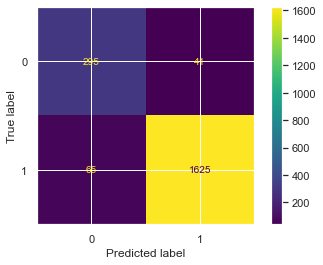

In [74]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_data,train_target)
pred = dt.predict(test_data)
print('Accuracy of DecisionTree classifier on training set: {:.5f}'.format(dt.score(train_data, train_target)))
print('Accuracy of DecisionTree classifier on test set: {:.5f}'.format(dt.score(test_data, test_target)))

print(f'F1 Score: {f1_score(test_target,pred)}\n')
print(classification_report(test_target,pred))
plot_confusion_matrix(estimator=dt,X=test_data,y_true=test_target)

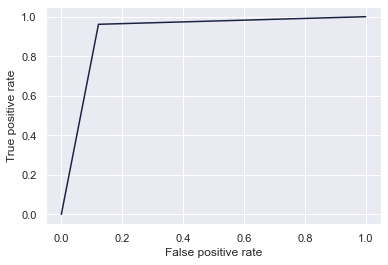

In [78]:
#assigning values
from sklearn import metrics
pre=dt.predict_proba(test_data)[::,1]
falsepr,truepr,_=metrics.roc_curve(test_target, pre)
#ROC curve
plt.plot(falsepr,truepr)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()


Accuracy of Gradient classifier on training set: 0.97223
Accuracy of Gradien classifier on test set: 0.96693
F1 Score: 0.968414779499404

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       336
           1       0.98      0.96      0.97      1690

    accuracy                           0.95      2026
   macro avg       0.90      0.92      0.91      2026
weighted avg       0.95      0.95      0.95      2026



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


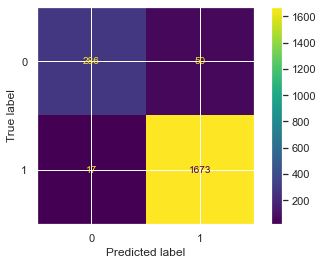

In [81]:
#gradientboost classifier
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(train_data,train_target)
pred = dt.predict(test_data)
print('Accuracy of Gradient classifier on training set: {:.5f}'.format(GB.score(train_data, train_target)))
print('Accuracy of Gradien classifier on test set: {:.5f}'.format(GB.score(test_data, test_target)))

print(f'F1 Score: {f1_score(test_target,pred)}\n')
print(classification_report(test_target,pred))
plot_confusion_matrix(estimator=GB,X=test_data,y_true=test_target)

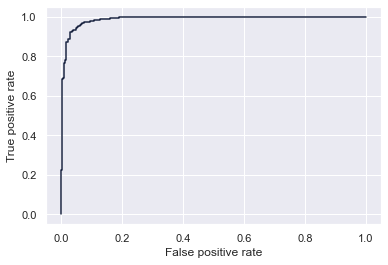

In [80]:
#assigning values
from sklearn import metrics
pre=GB.predict_proba(test_data)[::,1]
falsepr,truepr,_=metrics.roc_curve(test_target, pre)
#ROC curve
plt.plot(falsepr,truepr)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()
